# Statistical Sgnificance model evaluation

In this section we will be annalysing the results of all the models used, we will be testing if the are any significante differences in performance relative to the calculated metric like ex(recall,f1).
In the code below we are parsing all the csv files with the results, in the code there is a option to select only a specific model like svm or random forest, but we decided to compare all the models together, because it reduces the number of graphics while still manteining the significance of the results and making it easier to compare diferent models, we left that part of the code if anyone would like to see the diferencies in a specific model or with a specific feuture selector.

First we are calculating a boxplot for a specific metric with the 10 folds present in the cross validation to make a visualization of each models performance and understand better the results of the statiscal significance tests then we performe friedman significance test to see if there ara any significances in performance betwin any 2 models if so we print in a graphic were is posible to see wich models are significantly different from each other, then we calculated a critical significance diagram wich in a more clear way tells us wichs models are significantly diferent from each other but also ranks them in terms of performance 

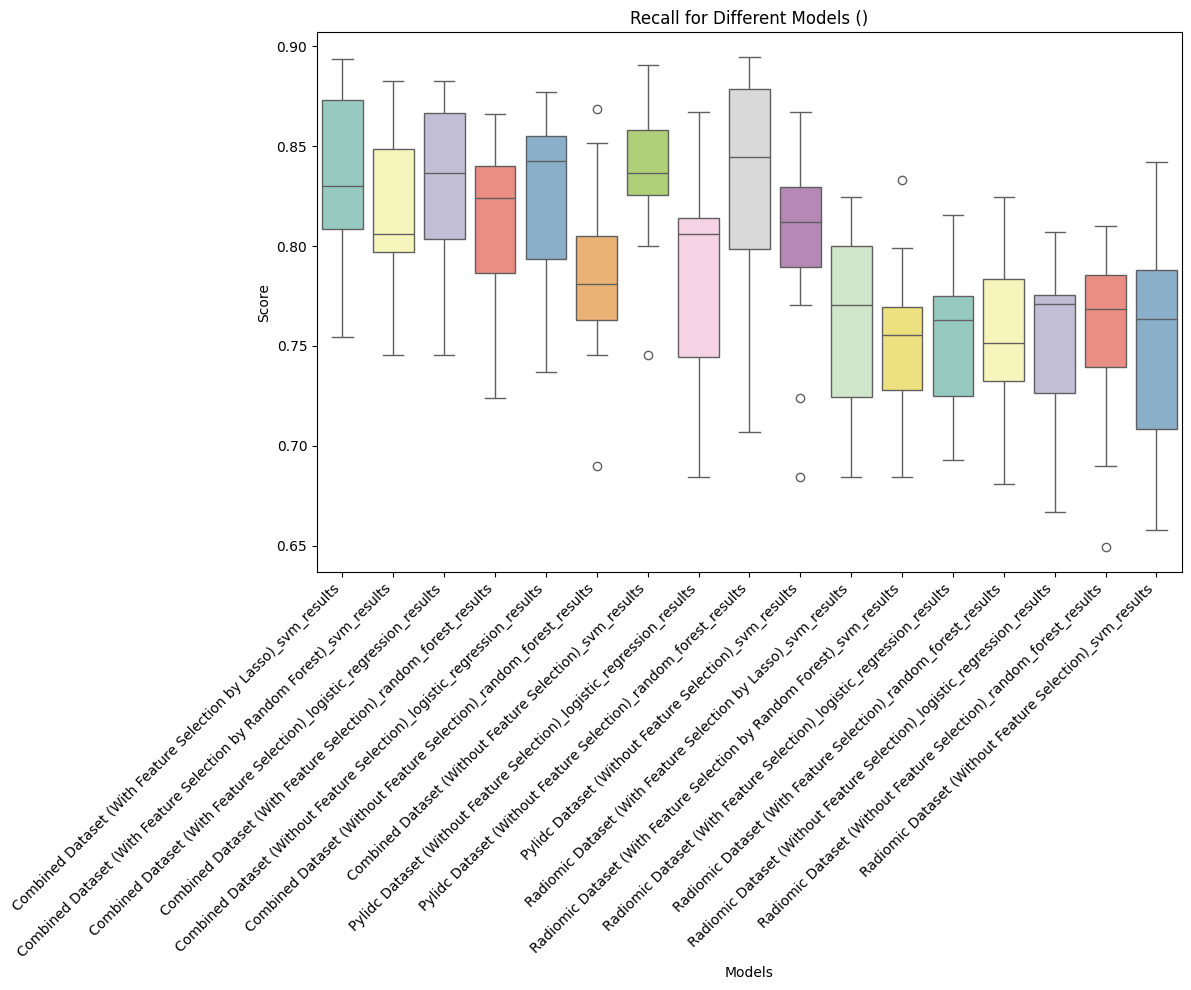

Recall - Friedman test statistic: 132.78462408140183, P-value: 1.845595009845795e-20
Significant differences found in recall. Running post hoc tests...


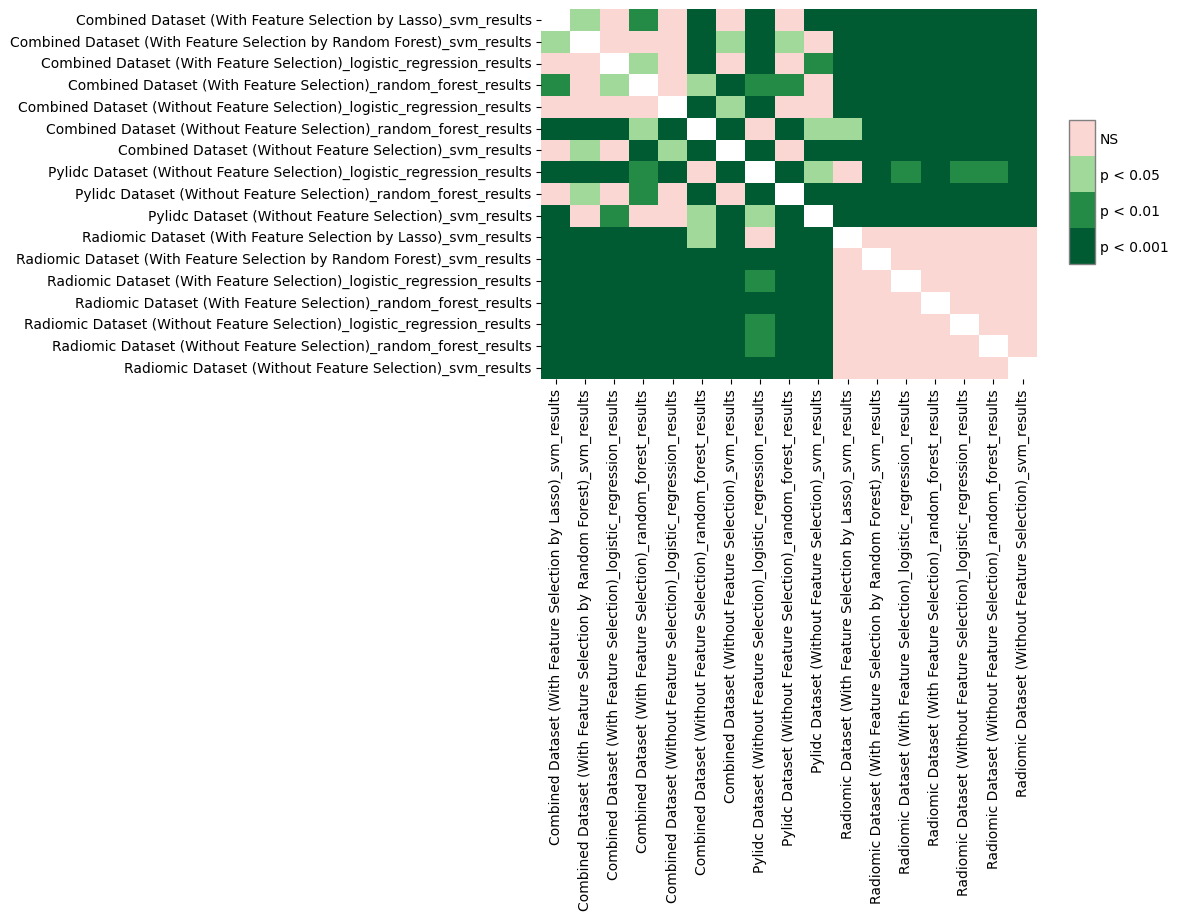

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


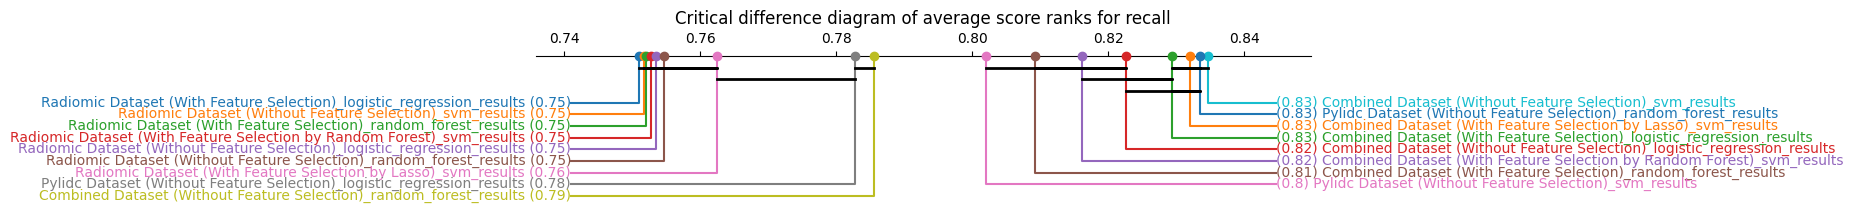

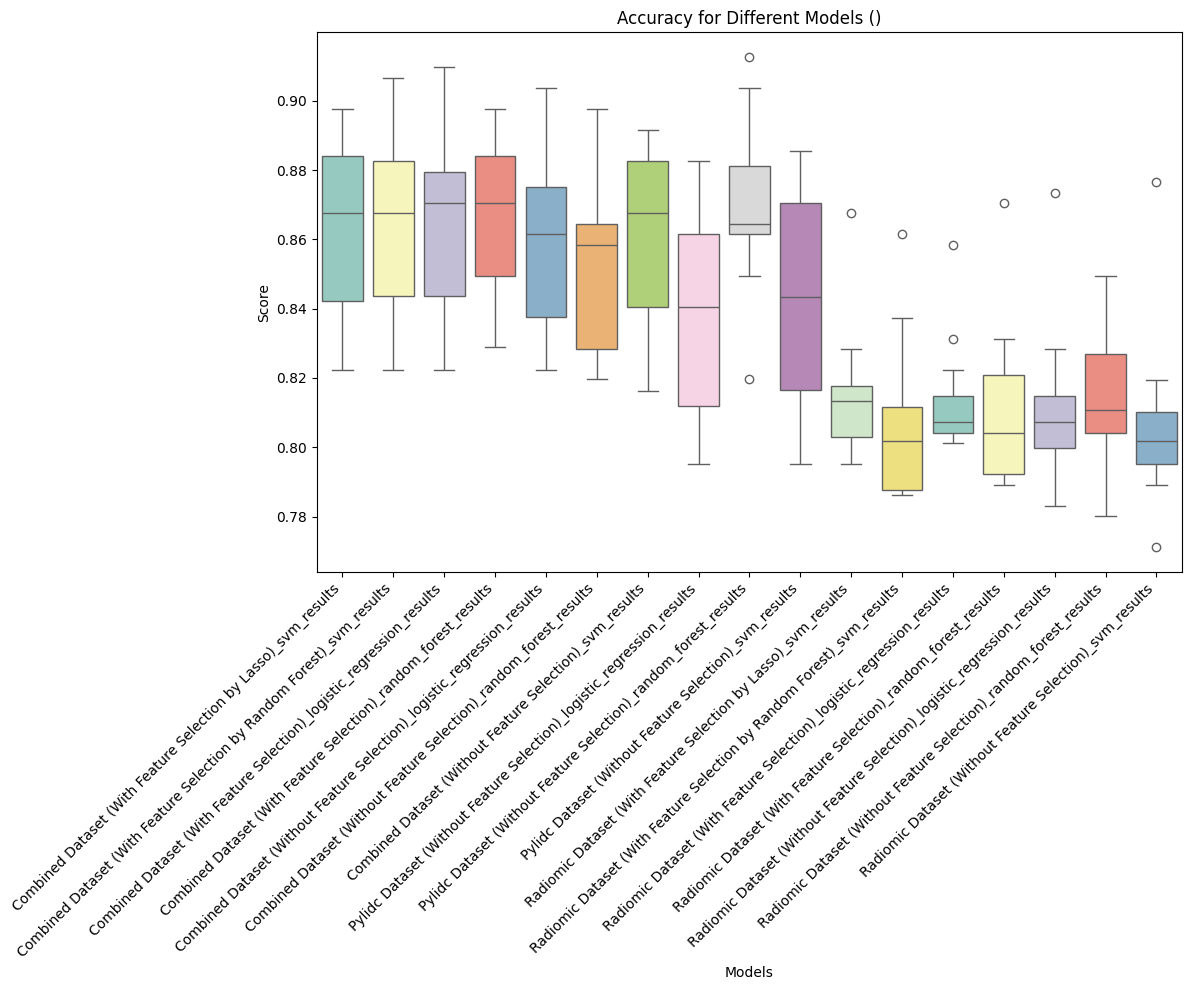

Accuracy - Friedman test statistic: 135.05087798289054, P-value: 6.677979737759848e-21
Significant differences found in accuracy. Running post hoc tests...


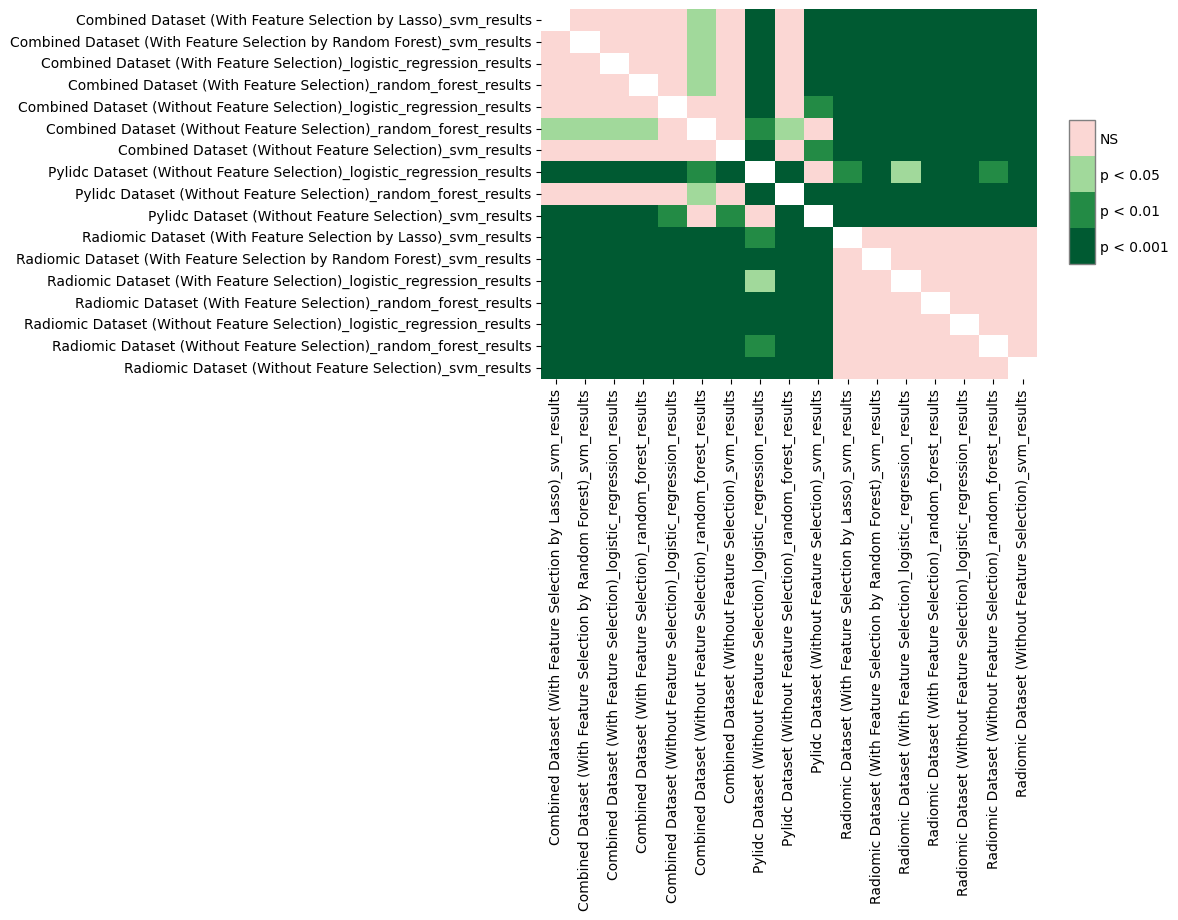

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


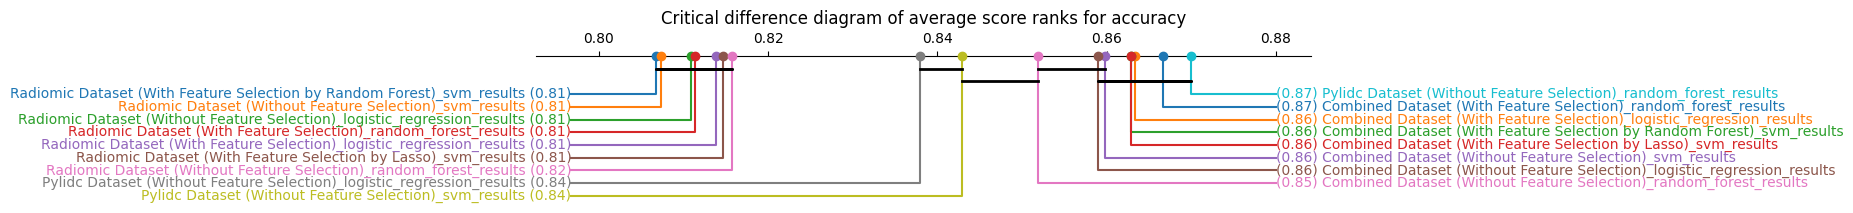

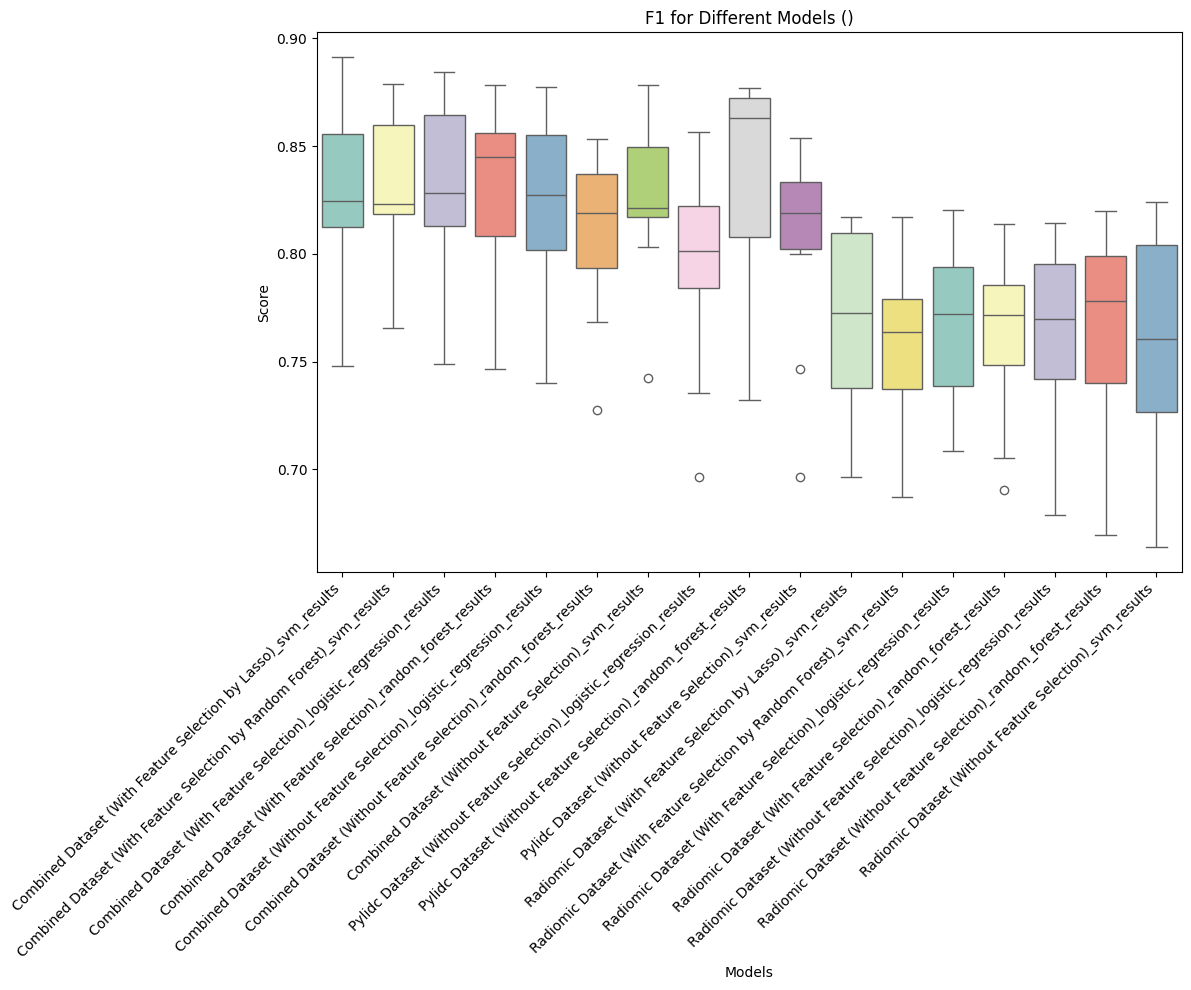

F1 - Friedman test statistic: 138.1952907041624, P-value: 1.624475888271711e-21
Significant differences found in f1. Running post hoc tests...


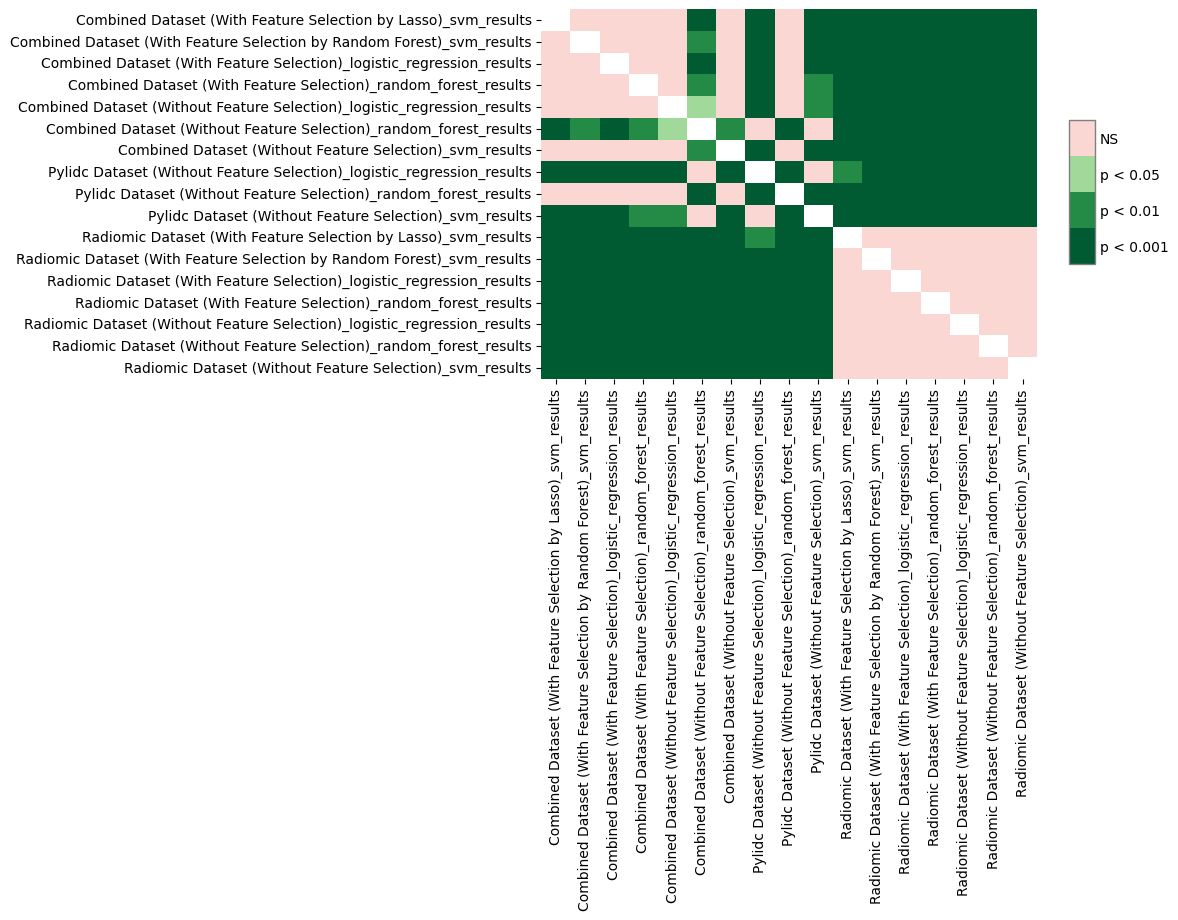

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


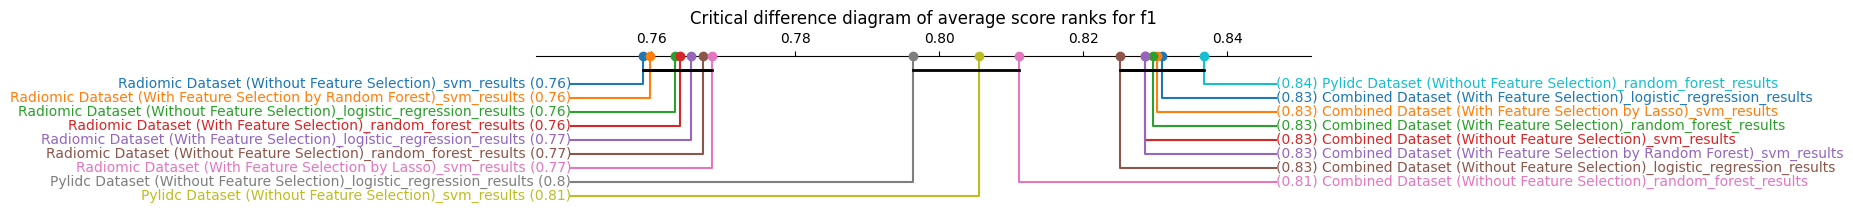

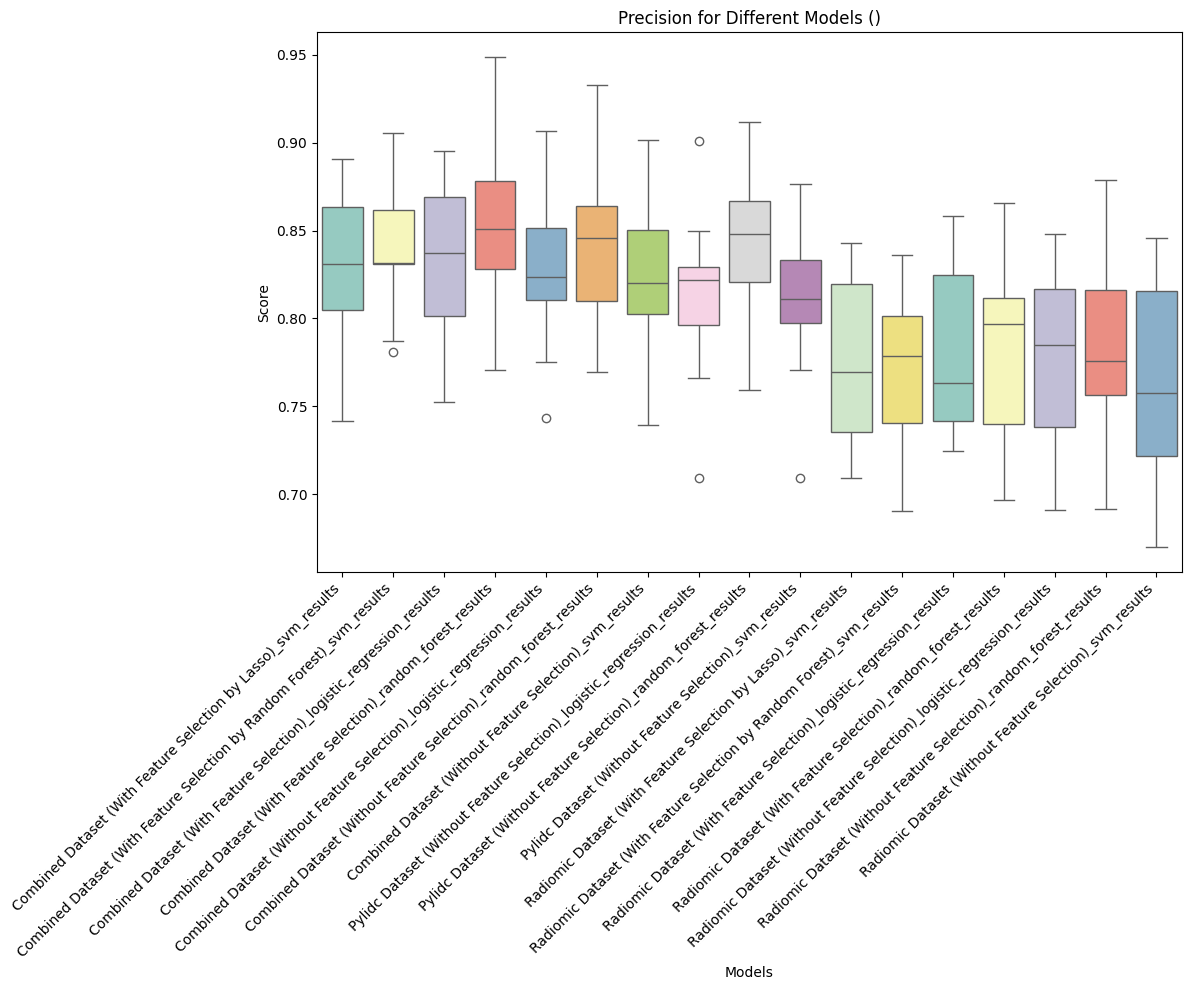

Precision - Friedman test statistic: 100.98392857142852, P-value: 2.2648095955523945e-14
Significant differences found in precision. Running post hoc tests...


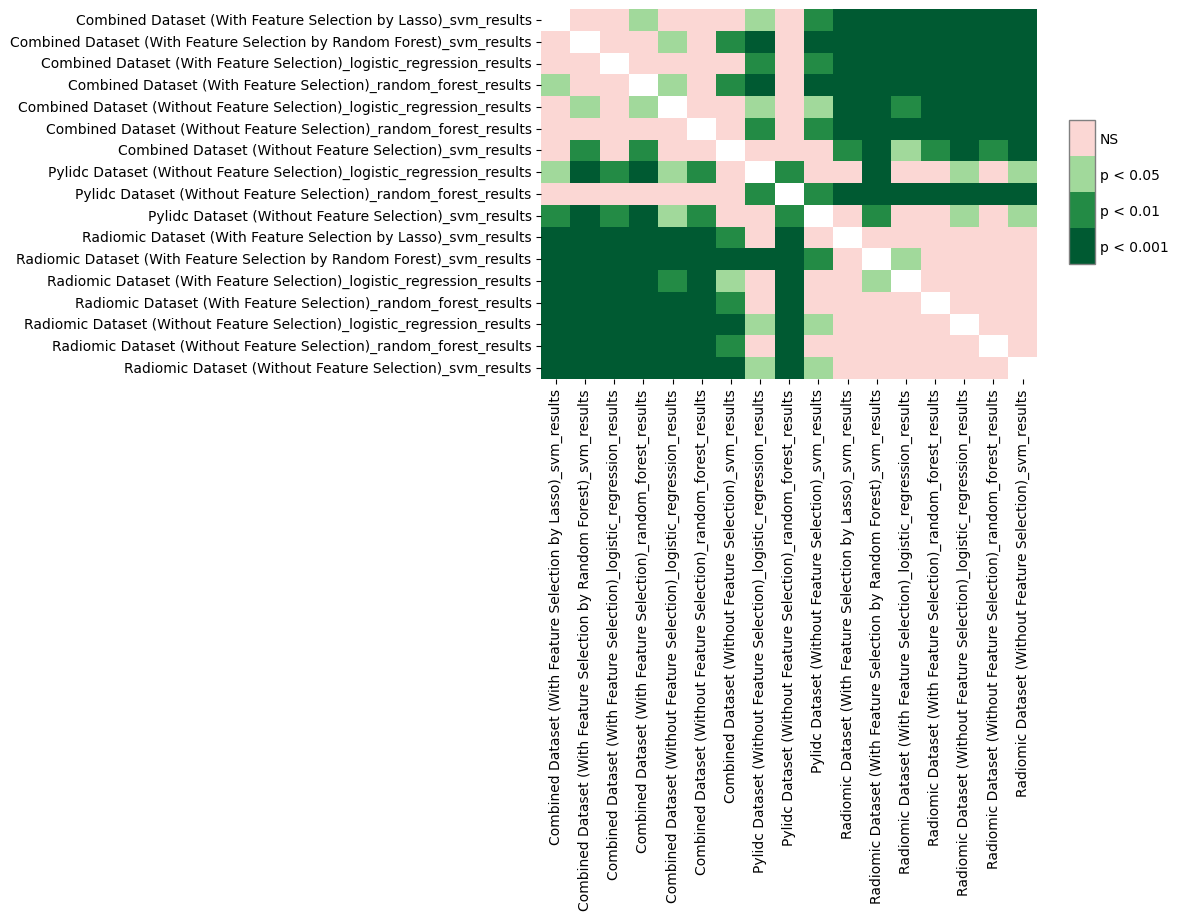

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


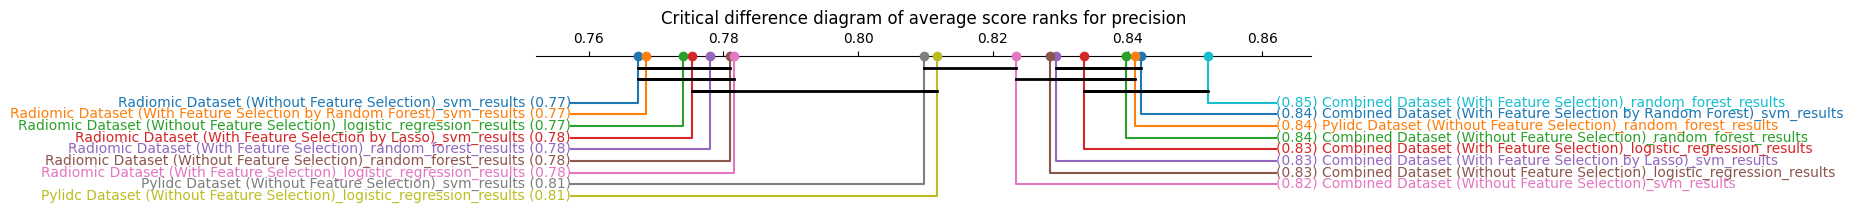

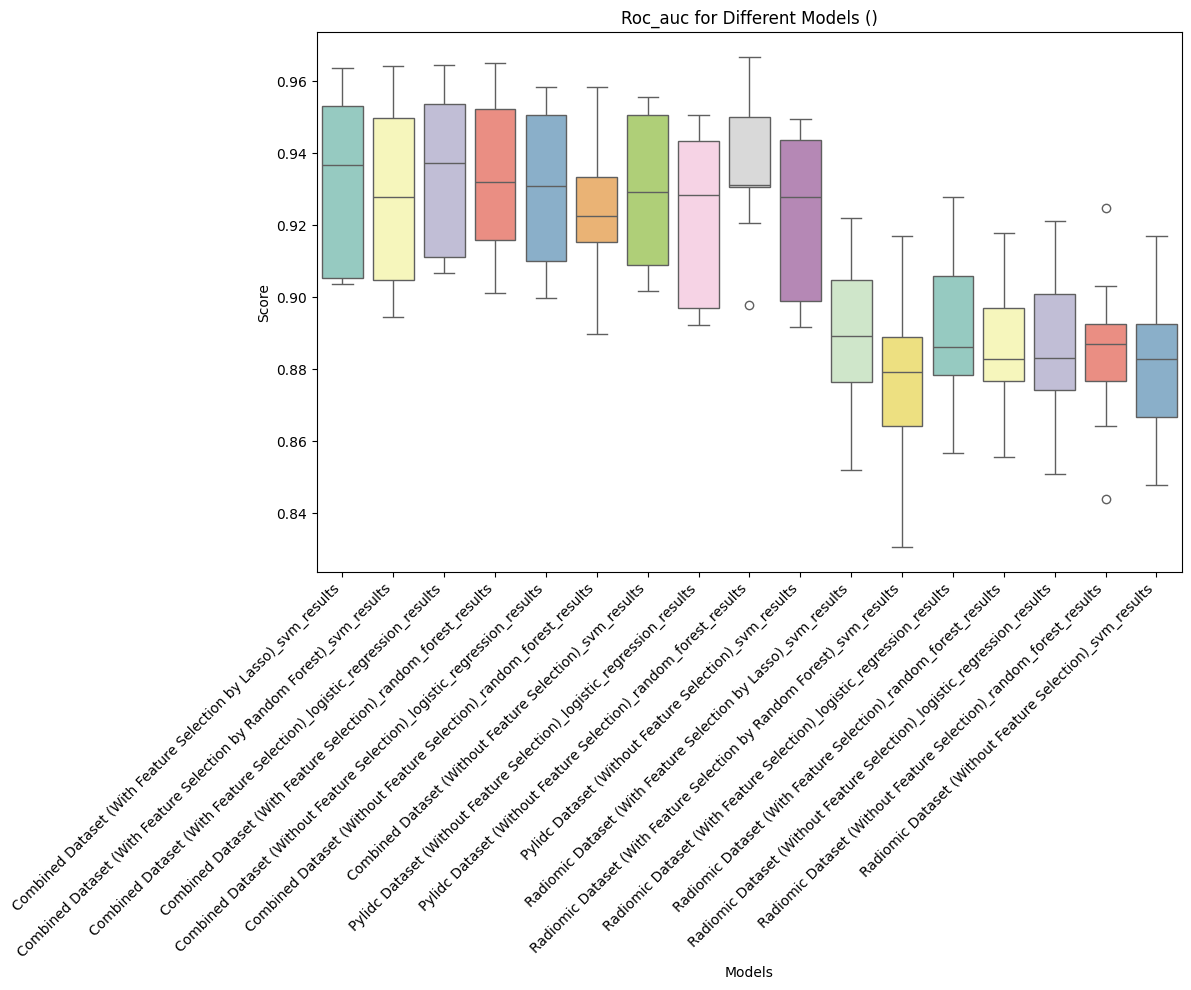

Roc_auc - Friedman test statistic: 149.85383244206764, P-value: 8.349224472549205e-24
Significant differences found in roc_auc. Running post hoc tests...


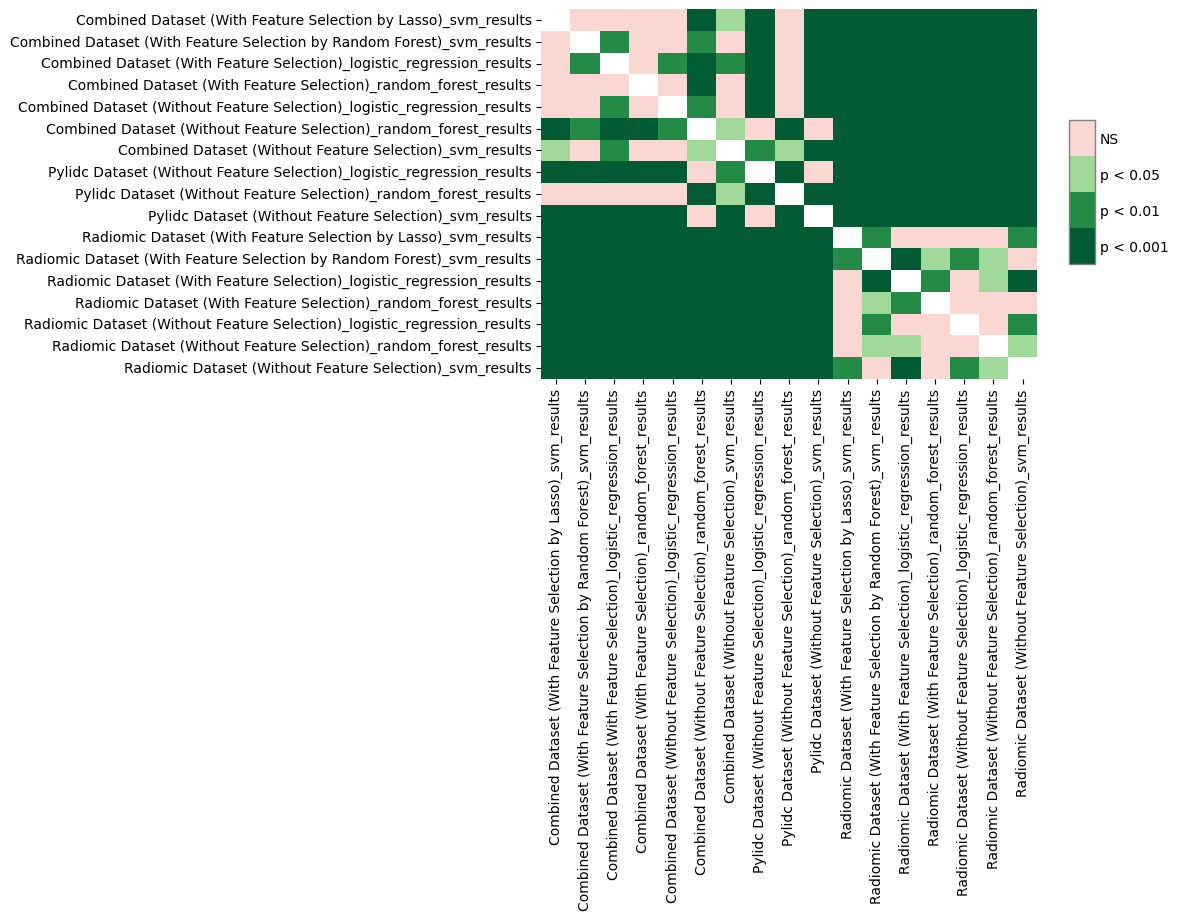

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


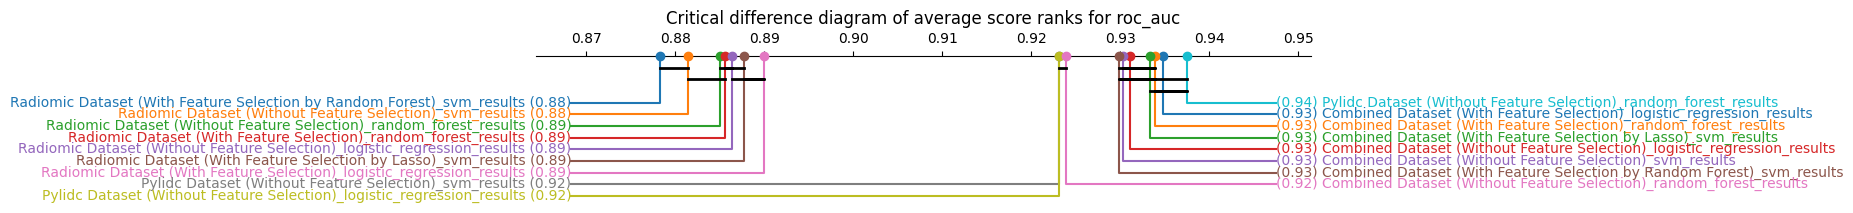

In [1]:
import pandas as pd
import glob
import scipy.stats as ss
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Specify the model pattern to filter files (e.g., 'svm' for SVM models)
model_pattern = ''  # Adjust this pattern for each model group (e.g., 'svm', 'svm_fs', etc.)

# Get all CSV files that match the model pattern
files = glob.glob(os.path.join(f'*{model_pattern}*.csv'))

# Store all data in a list to concatenate later
data_list = []

# Load each CSV file and store with an additional column for the file/model name
for file in files:
    model_name = os.path.splitext(os.path.basename(file))[0]  # Extract model name from file
    # Read all rows except the last 3 (assuming they contain 'mean', 'std', 'test_set')
    df = pd.read_csv(file)
    
    # If the CSV has at least 3 rows, drop the last 3 rows and get the mean from the 3rd last row
    if len(df) >= 3:
        df = df.iloc[:-3]
        mean_values = df.iloc[-2]  # Use the mean values from the 3rd last row
        mean_row = pd.Series(mean_values, name='mean').to_frame().T  # Convert to DataFrame
        mean_row['model'] = model_name  # Add model name for the mean row
        data_list.append(mean_row)
    
    # Append the main data excluding the last 3 rows
    df['model'] = model_name  # Add a column with the model name
    data_list.append(df)

# Concatenate all data for the specified model
data = pd.concat(data_list, ignore_index=True)

# List of metrics to analyze
metrics = ['recall', 'accuracy', 'f1', 'precision', 'roc_auc']

# Initialize a dictionary to store mean scores for each model and metric
mean_scores = {metric: [] for metric in metrics}

# Iterate over each metric to perform analysis
for metric in metrics:
    # Get mean scores for each model
    for model in data['model'].unique():
        mean_score = data[data['model'] == model][metric].mean()
        mean_scores[metric].append(mean_score)
    
    # Convert mean scores into a DataFrame for statistical tests
    results = pd.DataFrame({model: data[data['model'] == model][metric].values 
                            for model in data['model'].unique()})
    
    # Plotting
    plt.figure(figsize=(12, 10))  # Increase the width to give more space for labels
    sns.boxplot(data=[data[data['model'] == model][metric].values for model in data['model'].unique()],
                   palette="Set3")
    plt.title(f"{metric.capitalize()} for Different Models ({model_pattern})")
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.xticks(ticks=range(len(data['model'].unique())), 
               labels=data['model'].unique(), rotation=45, ha='right')  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()
    
    # Perform Friedman test
    statistic, p_value = ss.friedmanchisquare(*results.T.values)
    
    # If p-value indicates significant differences, perform post hoc test
    if p_value < 0.05:
        print(f"{metric.capitalize()} - Friedman test statistic: {statistic}, P-value: {p_value}")
        print(f"Significant differences found in {metric}. Running post hoc tests...")
        
        # Conover post hoc test
        friedman_results = sp.posthoc_conover_friedman(results)
        
        # Sign plot
        sp.sign_plot(friedman_results)
        plt.show()
        
        # Critical difference diagram
        avg_rank = results.mean()  # Calculate average ranks across models
        plt.figure(figsize=(10, 2), dpi=100)
        plt.title(f'Critical difference diagram of average score ranks for {metric}')
        sp.critical_difference_diagram(avg_rank, friedman_results)
        plt.show()


The code below is a portion of the code above just to calculate the critical significance diagram wich we will be using to draw some conclusions

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


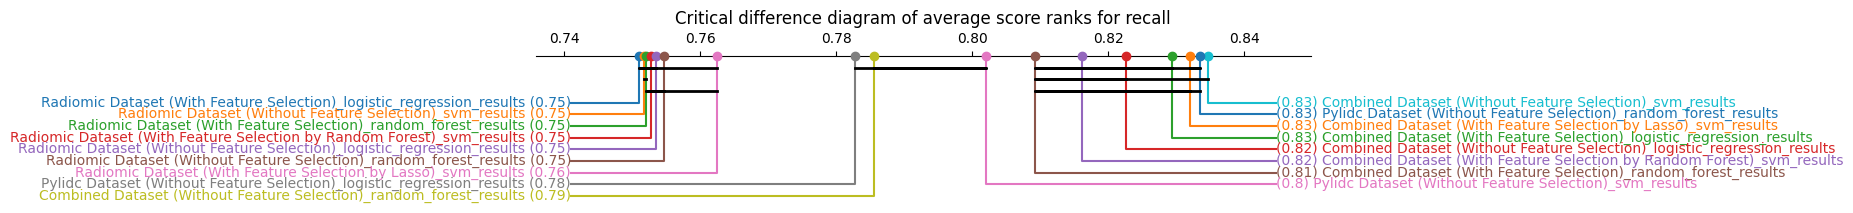

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


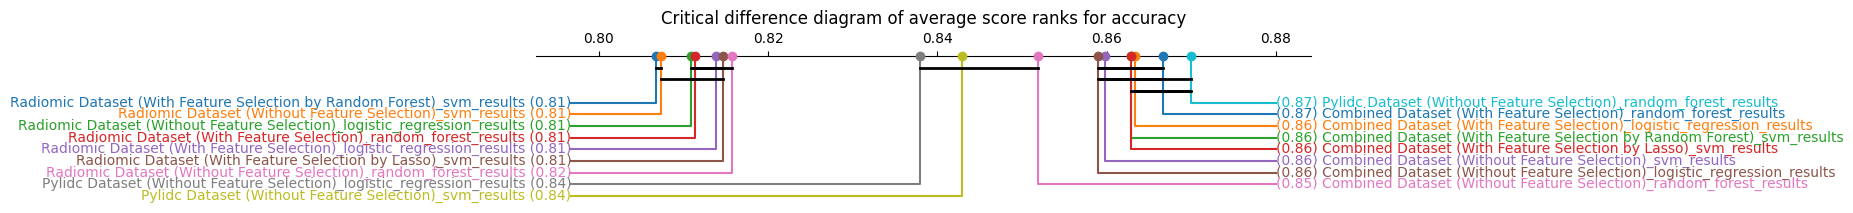

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


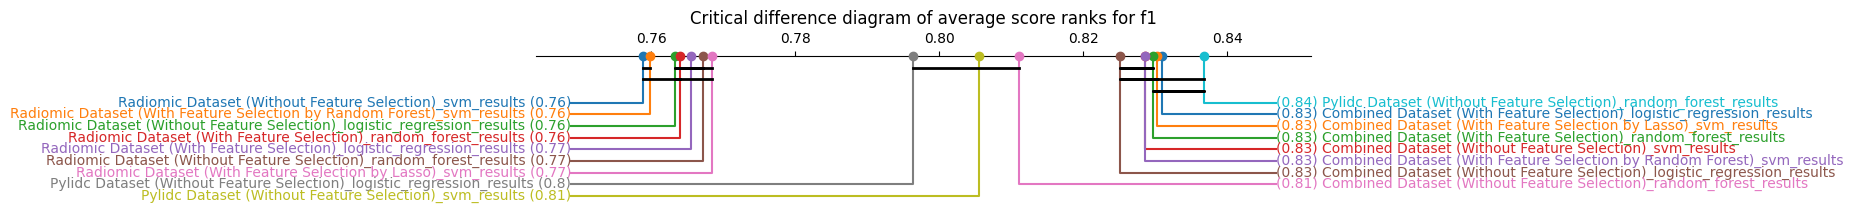

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


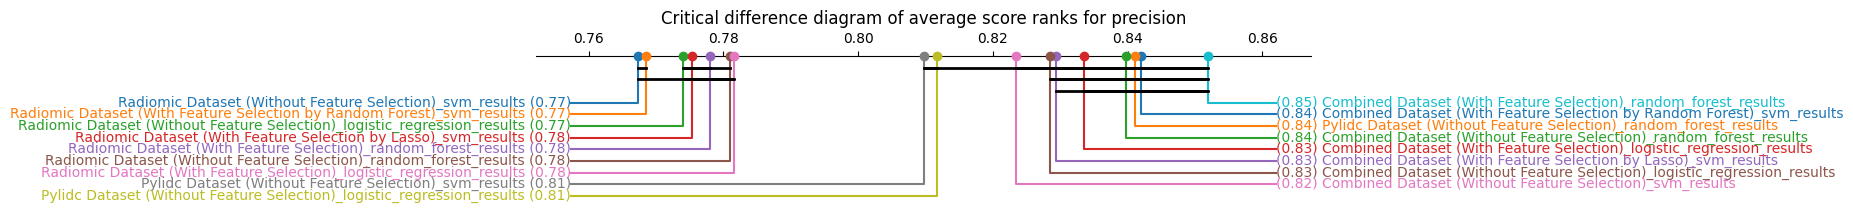

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


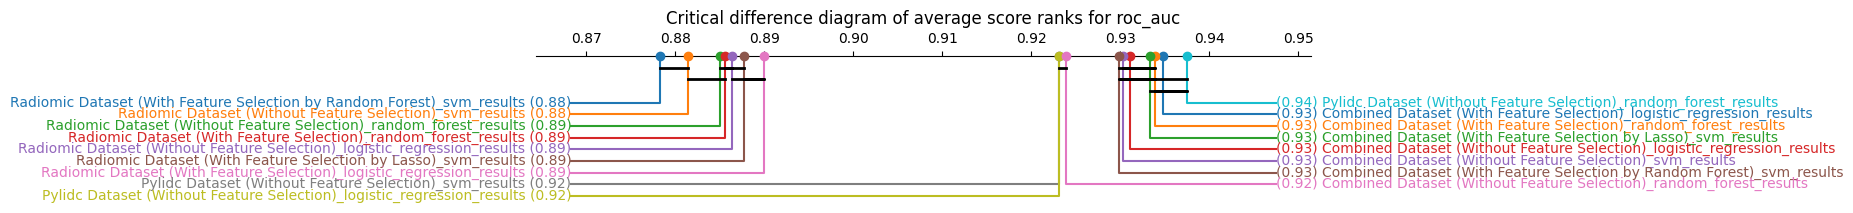

In [8]:
for metric in metrics:
    # Get mean scores for each model
    for model in data['model'].unique():
        mean_score = data[data['model'] == model][metric].mean()
        mean_scores[metric].append(mean_score)
    results = pd.DataFrame({model: data[data['model'] == model][metric].values 
                            for model in data['model'].unique()})
    avg_rank = results.mean()  # Calculate average ranks across models
    plt.figure(figsize=(10, 2), dpi=100)
    plt.title(f'Critical difference diagram of average score ranks for {metric}')
    sp.critical_difference_diagram(avg_rank, friedman_results)
    plt.show()

As is posible to see across all metrics the worst performing models are the ones that only use the radiomic feutures are almost always statistic iqual to each other but there are some models that in certan metric are better than each other but in general they are all prety bad thean there are the mediocral models that are the pylic withot feuture selction svm and logistic regression and combined dataset without feuture selection in all metrics exept precision they are significantly difrent for the best models and they sit beetween the best and the worst and finnaly there are the best models that are the ones i havent refered